In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape 

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

### Data Preprocessing

In [7]:
# Normalize images 
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0].shape

(28, 28)

### Modelling

In [9]:
model = Sequential()

# conv layer 1
model.add(Conv2D(filters=6, kernel_size=5, strides=(1, 1), padding="same", activation='tanh', input_shape=(28, 28, 1)))

# pooling 1
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# conv layer 2
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# pooling 2
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# conv layer 3
model.add(Conv2D(filters=120, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# Fully Conncted NN 
model.add(Dense(84, activation='tanh'))

# output layer 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dense (Dense)               (None, 1, 1, 84)          1

In [10]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

In [11]:
result = model.fit(X_train, y_train, verbose=1, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 85s 44ms/step - loss: 0.2278 - accuracy: 0.1263 - val_loss: 0.0992 - val_accuracy: 0.1224
Epoch 2/25
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0845 - accuracy: 0.1277 - val_loss: 0.0792 - val_accuracy: 0.1224
Epoch 3/25
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0567 - accuracy: 0.1274 - val_loss: 0.0560 - val_accuracy: 0.1225
Epoch 4/25
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0419 - accuracy: 0.1281 - val_loss: 0.0520 - val_accuracy: 0.1226
Epoch 5/25
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0354 - accuracy: 0.1278 - val_loss: 0.0705 - val_accuracy: 0.1226
Epoch 6/25
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0301 - accuracy: 0.1277 - val_loss: 0.0548 - val_accuracy: 0.1228
Epoch 7/25
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0225 - accuracy: 0.1281 - val_loss: 0.0551

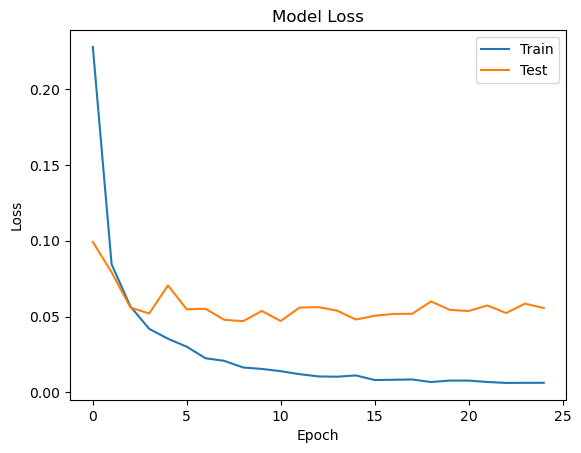

In [12]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

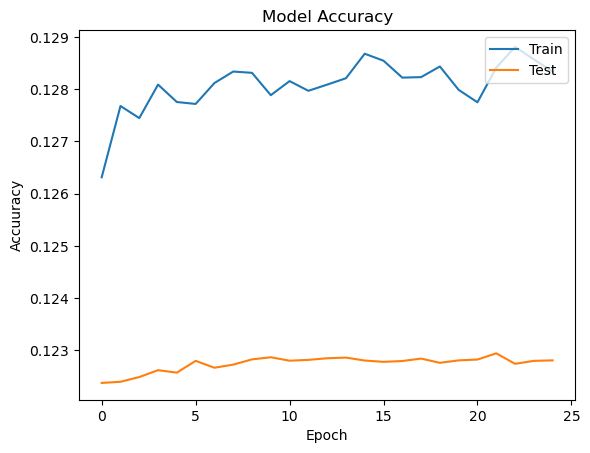

In [13]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

In [14]:
model.save("mnist_classification_model_CNN.h5")

In [15]:
my_model = load_model("mnist_classification_model_CNN.h5")
